In [3]:
import numpy as np

array = np.array([[1,2,3],[3,4,5],[5,6,7]])

In [4]:
array[:,1]

array([2, 4, 6])

In [5]:
import random

vector = np.array([1,0,0])

np.linalg.norm(array@vector)

5.916079783099616

In [6]:
array_flatten = array.flatten()

array_flatten.shape

(9,)

In [7]:
array_flatten.reshape((3,3)).shape

(3, 3)

In [8]:
from scipy.fftpack import dct, idct

dct_array = dct(array_flatten, norm = 'ortho')

idct(dct_array, norm = 'ortho')

array([1., 2., 3., 3., 4., 5., 5., 6., 7.])

In [9]:
a = np.array([1,2,3])
b = np.array([1,2,3])

a*b

array([1, 4, 9])

In [10]:
# Define the size of the DCT (e.g., for a sequence of length N)
N = 4

# Create an N x N identity matrix
identity_matrix = np.eye(N)

# Apply the 1D DCT to each column of the identity matrix
# The result will be the DCT transform matrix
dct_matrix = idct(identity_matrix, axis=0, norm='ortho') # 'ortho' norm ensures orthonormality

print("DCT Transform Matrix (N={}):".format(N))
print(dct_matrix)

DCT Transform Matrix (N=4):
[[ 0.5         0.65328148  0.5         0.27059805]
 [ 0.5         0.27059805 -0.5        -0.65328148]
 [ 0.5        -0.27059805 -0.5         0.65328148]
 [ 0.5        -0.65328148  0.5        -0.27059805]]


In [14]:
np.linalg.norm(array_flatten, ord = 0.3)**(0.3)

13.273512335803359

In [12]:
array_flatten + 2

array([3, 4, 5, 5, 6, 7, 7, 8, 9])

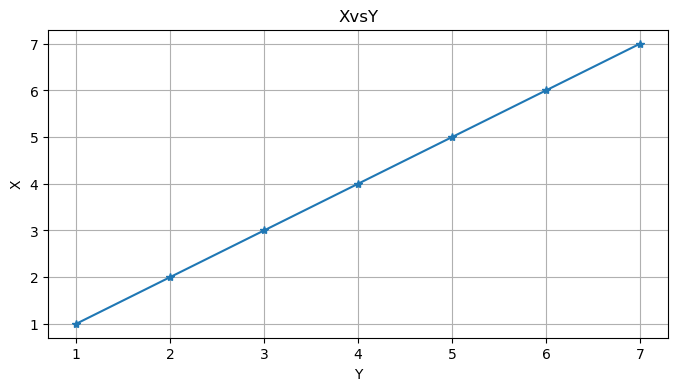

In [15]:
import matplotlib.pyplot as plt

def line_plot(list, titlex, titley):
    x = range(1,len(list)+1)
    plt.figure(figsize=(8,4))
    plt.plot(x, list, marker = '*')
    plt.title(titlex+"vs"+titley)
    plt.xlabel(titley)
    plt.ylabel(titlex)
    plt.grid(True)
    plt.show()



list = [1,2,3,4,5,6,7]
line_plot(list, "X", "Y")

In [ ]:
import time as time

W = np.zeros((32768, 65536))
idx = np.random.choice(65536, size=32768, replace=False)
W[np.arange(32768), idx] = 1


x = np.random.normal(5,2, (65536,))
m = np.ones((32768,))
start_time_dct = time.time()
y = dct(x, norm = "ortho")
end_time_dct = time.time()

# print("Time taken for DCT:", (end_time_dct-start_time_dct))

st_1l = time.time()
idx = np.argmax(W, axis=1)
# st_2l = time.time()
diff = x[idx] - m
st_3l = time.time()
term1 = np.sum(diff * diff)
st_4l = time.time()

print("Time taken for 1st line:", (st_2l-st_1l))
print("Time taken for 2nd line:", (st_3l-st_2l))
print("Time taken for 3rd line:", (st_4l-st_3l))

start_time_second_term = time.time()
term2 = 1e-4 * np.sum(np.abs(1e-6 + y**2)**0.3)
end_time_second_term = time.time()

# print("Time taken for second term:", (end_time_second_term-start_time_second_term))

Time taken for 2nd line: 1.6194870471954346
Time taken for 3rd line: 0.00011515617370605469


In [22]:
idx = [1,4,5]
list = [2,5,6]

x= np.zeros((9,))
x
x[idx] = list
x

array([0., 2., 0., 0., 5., 6., 0., 0., 0.])

In [24]:
M,N = 5,10
W = np.zeros((M, N))
idx = np.random.choice(N, size=M, replace=False)
W[np.arange(M), idx] = 1

mask = (W.sum(axis=0) > 0)
mask

array([False, False,  True,  True,  True, False,  True, False,  True,
       False])

In [28]:
mask1 = np.zeros(N)
mask1[idx] = 1
mask1

array([0., 0., 1., 1., 1., 0., 1., 0., 1., 0.])